In [1]:
from src.data_preprocessing.load_data import load_data
from src.data_preprocessing.data_augmentation import augment_data
from src.data_preprocessing.basic_preprocessing import preprocess_data
from src.data_preprocessing.displayer import display_images
from src.training.training import create_resnet50_model, create_mobilenetv2_model, create_vgg16_model, plot_training_history, train_model
from src.training.optimize_dataset import optimize_dataset
from src.training.save_model import save_model_and_history
from src.evaluation.evaluation import evaluate_model

In [2]:
SAVE_BASE_DIR = './saved'

IMAGE_COLUMN = 224
IMAGE_ROW = 224
IMAGE_SIZE = (IMAGE_COLUMN, IMAGE_ROW)
INPUT_SIZE = (IMAGE_COLUMN, IMAGE_ROW, 3)
NUM_CLASSES = 4

TRAINING_DIR = './data/raw/Training/'
TESTING_DIR = './data/raw/Testing/'
BATCH_SIZE = 32
EPOCHS = 10

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
['glioma', 'meningioma', 'notumor', 'pituitary']
['glioma', 'meningioma', 'notumor', 'pituitary']
['glioma', 'meningioma', 'notumor', 'pituitary']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..250.57661].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..249.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..226.45088].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..246.14278].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..248.16298].


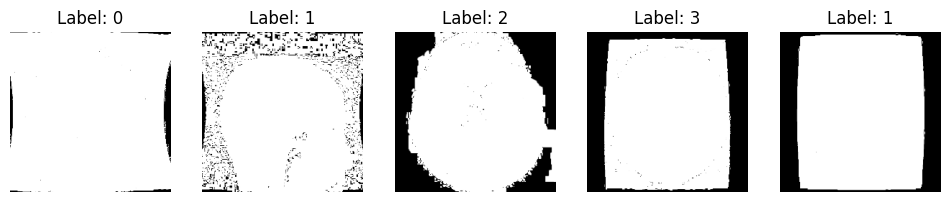

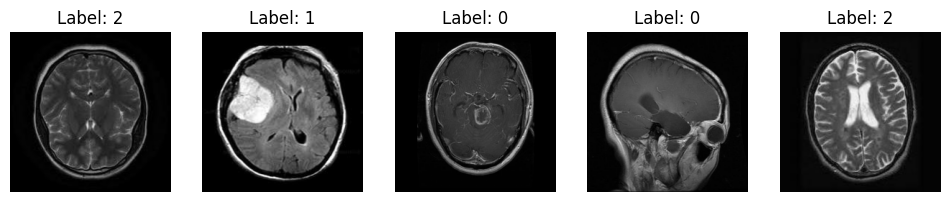

In [3]:
trainset, validset, testset = load_data(
    TRAINING_DIR,
    training_dir=TRAINING_DIR,
    testing_dir=TESTING_DIR,
    batch_size=BATCH_SIZE,
    img_size=IMAGE_SIZE,
    color_mode='rgb'
)

print(trainset.class_names)
print(validset.class_names)
print(testset.class_names)
class_names = testset.class_names

display_images(trainset, num_images=5, color_mode='jet', normalize=False)
display_images(trainset, num_images=5, color_mode='jet', normalize=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..173.9331].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..245.77856].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [41.997448..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [10.65035..227.8766].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [32.8924..255.0].


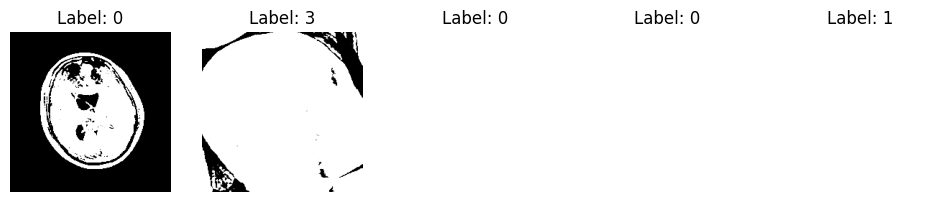

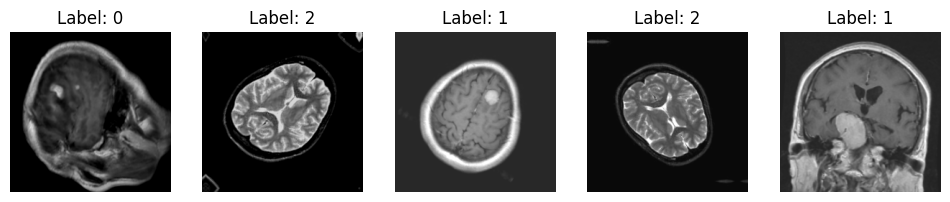

In [4]:
augmented_trainset = augment_data(trainset)

display_images(augmented_trainset, num_images=5, color_mode='jet', normalize=False)
display_images(augmented_trainset, num_images=5, color_mode='jet', normalize=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-88.86224..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-119.94053..139.50616].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.18096..110.754005].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-81.7077..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..108.98614].


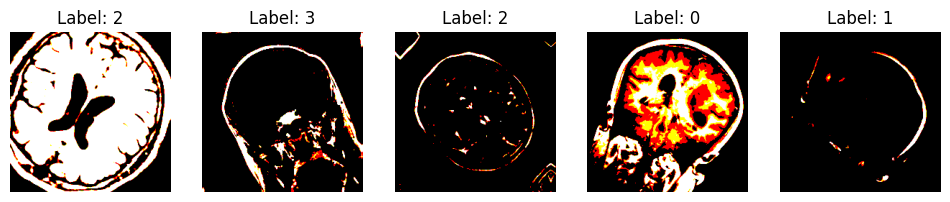

In [5]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='vgg16')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='vgg16')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='vgg16')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 357s 2s/step - accuracy: 0.6063 - loss: 1.3061 - val_accuracy: 0.8485 - val_loss: 0.3985 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 421s 3s/step - accuracy: 0.7832 - loss: 0.6419 - val_accuracy: 0.9702 - val_loss: 0.0903 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 605s 4s/step - accuracy: 0.8179 - loss: 0.5368 - val_accuracy: 0.9606 - val_loss: 0.1209 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8334 - loss: 0.4712
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
143/143 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - accuracy: 0.8346 - loss: 0.4607 - val_accuracy: 0.9632 - val_loss: 0.1084 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 606s 4s/step - accuracy: 0.8530 - loss: 0.4185 - val_accuracy: 0.9842 - val_loss: 0.0667 - learning_rate: 1.0000e-04
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - accuracy: 0.8484 - loss: 

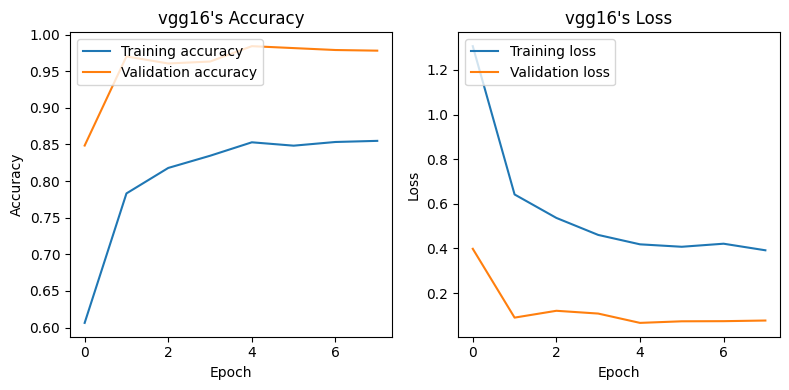

41/41 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8024 - loss: 0.6524
Test loss: 0.6524
Test accuracy: 0.8024
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
vgg16_model = create_vgg16_model(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

vgg16_history, vgg16_model = train_model(
    vgg16_model,
    optimized_trainset,
    optimized_validset,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
)

plot_training_history(vgg16_history, model_name='vgg16',
                      save_path=f'{SAVE_BASE_DIR}/vgg16/plot.png')

evaluate_model(vgg16_model, optimized_testset, class_names=class_names, save_path="saved/vgg16/confusion_matrix.png")

save_model_and_history(vgg16_model, vgg16_history,
                       model_filename=f"{SAVE_BASE_DIR}/vgg16/model.keras",
                       history_filename=f"{SAVE_BASE_DIR}/vgg16/history.json")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-100.1657..145.31598].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-85.40202..151.061].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..48.69494].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-123.68..148.26102].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-102.18948..145.18094].


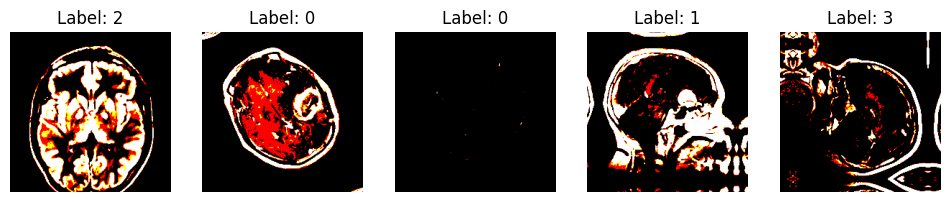

In [7]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='resnet50v2')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='resnet50v2')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='resnet50v2')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 299s 1s/step - accuracy: 0.7694 - loss: 0.6108 - val_accuracy: 0.9956 - val_loss: 0.0598 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.8591 - loss: 0.3799 - val_accuracy: 0.9825 - val_loss: 0.1102 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8817 - loss: 0.3269
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
143/143 ━━━━━━━━━━━━━━━━━━━━ 275s 1s/step - accuracy: 0.8836 - loss: 0.3245 - val_accuracy: 0.9860 - val_loss: 0.0935 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.8919 - loss: 0.2929 - val_accuracy: 0.9895 - val_loss: 0.0830 - learning_rate: 1.0000e-04
Plot saved to ./saved/resnet50v2/plot.png


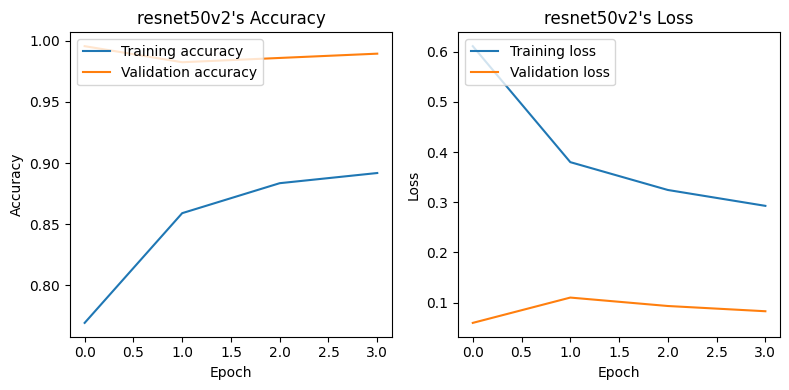

41/41 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7727 - loss: 0.5862
Test loss: 0.5862
Test accuracy: 0.7727
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
resnet50_model = create_resnet50_model(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

resnet50_history, resnet50_model = train_model(
    resnet50_model,
    optimized_trainset,
    optimized_validset,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

plot_training_history(resnet50_history, model_name='resnet50v2',
                      save_path=f'{SAVE_BASE_DIR}/resnet50v2/plot.png')

evaluate_model(resnet50_model, optimized_testset, class_names=class_names, save_path='saved/resnet50v2/confusion_matrix.png')

save_model_and_history(resnet50_model, resnet50_history, 
                       model_filename=f"{SAVE_BASE_DIR}/resnet50v2/model.keras", 
                       history_filename=f"{SAVE_BASE_DIR}/resnet50v2/history.json")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.72934043..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9277803].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8453498].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.8667942].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.89693725].


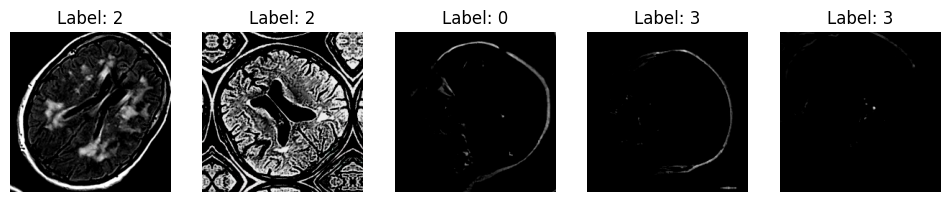

In [9]:
preprocessed_trainset = preprocess_data(augmented_trainset, img_size=IMAGE_SIZE, model_type='mobilenetv2')
preprocessed_validset = preprocess_data(validset, img_size=IMAGE_SIZE, model_type='mobilenetv2')
preprocessed_testset = preprocess_data(testset, img_size=IMAGE_SIZE, model_type='mobilenetv2')

display_images(preprocessed_trainset, num_images=5, color_mode='jet')

optimized_trainset = optimize_dataset(preprocessed_trainset, batch_size=BATCH_SIZE, prefetch=True, shuffle=True)
optimized_validset = optimize_dataset(preprocessed_validset, batch_size=BATCH_SIZE, prefetch=True)
optimized_testset = optimize_dataset(preprocessed_testset, batch_size=BATCH_SIZE, prefetch=True)

Epoch 1/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 143s 400ms/step - accuracy: 0.7540 - loss: 0.6425 - val_accuracy: 0.9851 - val_loss: 0.1561 - learning_rate: 0.0010
Epoch 2/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 133s 388ms/step - accuracy: 0.8591 - loss: 0.3941 - val_accuracy: 0.9571 - val_loss: 0.2017 - learning_rate: 0.0010
Epoch 3/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 133s 377ms/step - accuracy: 0.8691 - loss: 0.3505 - val_accuracy: 0.9781 - val_loss: 0.1382 - learning_rate: 0.0010
Epoch 4/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 145s 444ms/step - accuracy: 0.8899 - loss: 0.3183 - val_accuracy: 0.9904 - val_loss: 0.0763 - learning_rate: 0.0010
Epoch 5/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 2285s 16s/step - accuracy: 0.8906 - loss: 0.3031 - val_accuracy: 0.9869 - val_loss: 0.0726 - learning_rate: 0.0010
Epoch 6/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 55s 208ms/step - accuracy: 0.8932 - loss: 0.2906 - val_accuracy: 0.9825 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 7/10
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 

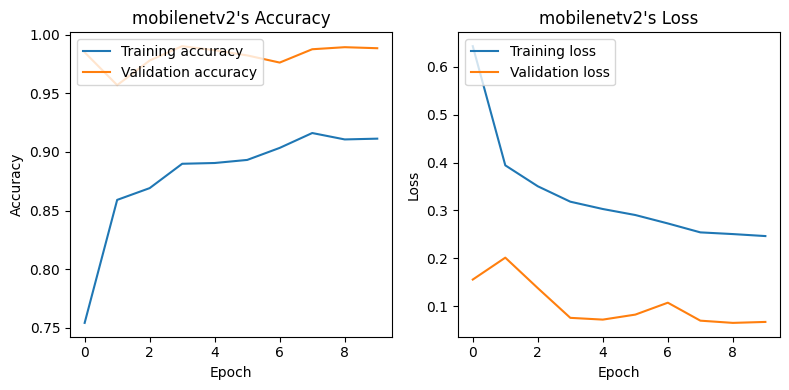

41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 291ms/step - accuracy: 0.8391 - loss: 0.4217
Test loss: 0.4217
Test accuracy: 0.8391
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3

In [ ]:
mobilenetv2_model = create_mobilenetv2_model(input_shape=INPUT_SIZE, num_classes=NUM_CLASSES)

mobilenetv2_history, mobilenetv2_model = train_model(
    mobilenetv2_model,
    optimized_trainset,
    optimized_validset,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS
)

plot_training_history(mobilenetv2_history, model_name='mobilenetv2',
                      save_path=f'{SAVE_BASE_DIR}/mobilenetv2/plot.png')

evaluate_model(mobilenetv2_model, optimized_testset, class_names=class_names, save_path='saved/mobilenetv2/confusion_matrix.png')

save_model_and_history(mobilenetv2_model, mobilenetv2_history, 
                       model_filename=f"{SAVE_BASE_DIR}/mobilenetv2/model.keras", 
                       history_filename=f"{SAVE_BASE_DIR}/mobilenetv2/history.json")

In [22]:
import os
import tensorflow as tf
import numpy as np
import keras
from src.data_preprocessing.basic_preprocessing import preprocess_data

import os
import tensorflow as tf

model = keras.models.load_model('./saved/resnet50v2/model.keras')

testing_dir = 'data/raw/Testing/'
first_images = {}

for class_name in os.listdir(testing_dir):
    class_path = os.path.join(testing_dir, class_name)
    
    if os.path.isdir(class_path):
        files = os.listdir(class_path)
        image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        if image_files:
            first_image_path = os.path.join(class_path, image_files[0])
            
            img = tf.io.read_file(first_image_path)
            img = tf.image.decode_image(img, channels=3)
            img = tf.cast(img, tf.float32)
            
            first_images[class_name] = img
            print(first_image_path)

class_names = list(first_images.keys())

for class_name, img_tensor in first_images.items():
    dataset = tf.data.Dataset.from_tensors((img_tensor, 0))
    preprocessed_dataset = preprocess_data(dataset, img_size=(224, 224), normalize=True, model_type='vgg16')
    for x, y in preprocessed_dataset:
        img_preprocessed = x
    
    img_batch = tf.expand_dims(img_preprocessed, axis=0)
    
    predictions = model.predict(img_batch)
    predicted_class_idx = np.argmax(predictions, axis=-1)[0]
    probability = predictions[0][predicted_class_idx]
    predicted_class_name = class_names[predicted_class_idx]
    
    print(f"True class: {class_name}")
    print(f"Predicted class index: {predicted_class_idx}")
    print(f"Predicted class name: {predicted_class_name}")
    print(f"Probability: {probability}\n")


data/raw/Testing/glioma\Te-glTr_0000.jpg
data/raw/Testing/meningioma\Te-meTr_0000.jpg
data/raw/Testing/notumor\Te-noTr_0000.jpg
data/raw/Testing/pituitary\Te-piTr_0000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
True class: glioma
Predicted class index: 0
Predicted class name: glioma
Probability: 0.9658101797103882

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
True class: meningioma
Predicted class index: 1
Predicted class name: meningioma
Probability: 0.575107991695404

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
True class: notumor
Predicted class index: 1
Predicted class name: meningioma
Probability: 0.780962347984314

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
True class: pituitary
Predicted class index: 3
Predicted class name: pituitary
Probability: 0.9767659902572632

